
<h2 align="center">8_A</h2> 

#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image as img

In [2]:
def draw_line(coef,intercept, mi, ma): # FUCTION TO DRAW SEPERATING PLANE
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1]) 

#### Creating 2d imbalanced data points 

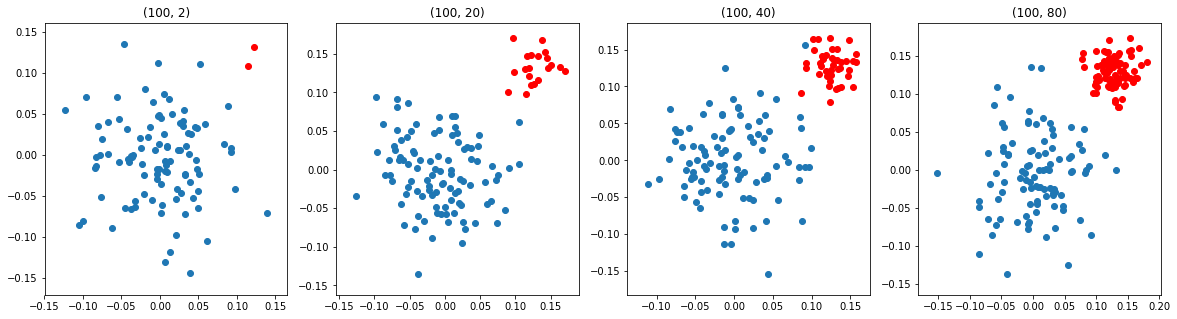

In [3]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)] #CREATING DATA BASED ON THESE TUPLE RATIOS
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    plt.title(str(i))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    
plt.show()

### Task 1: Applying SVM

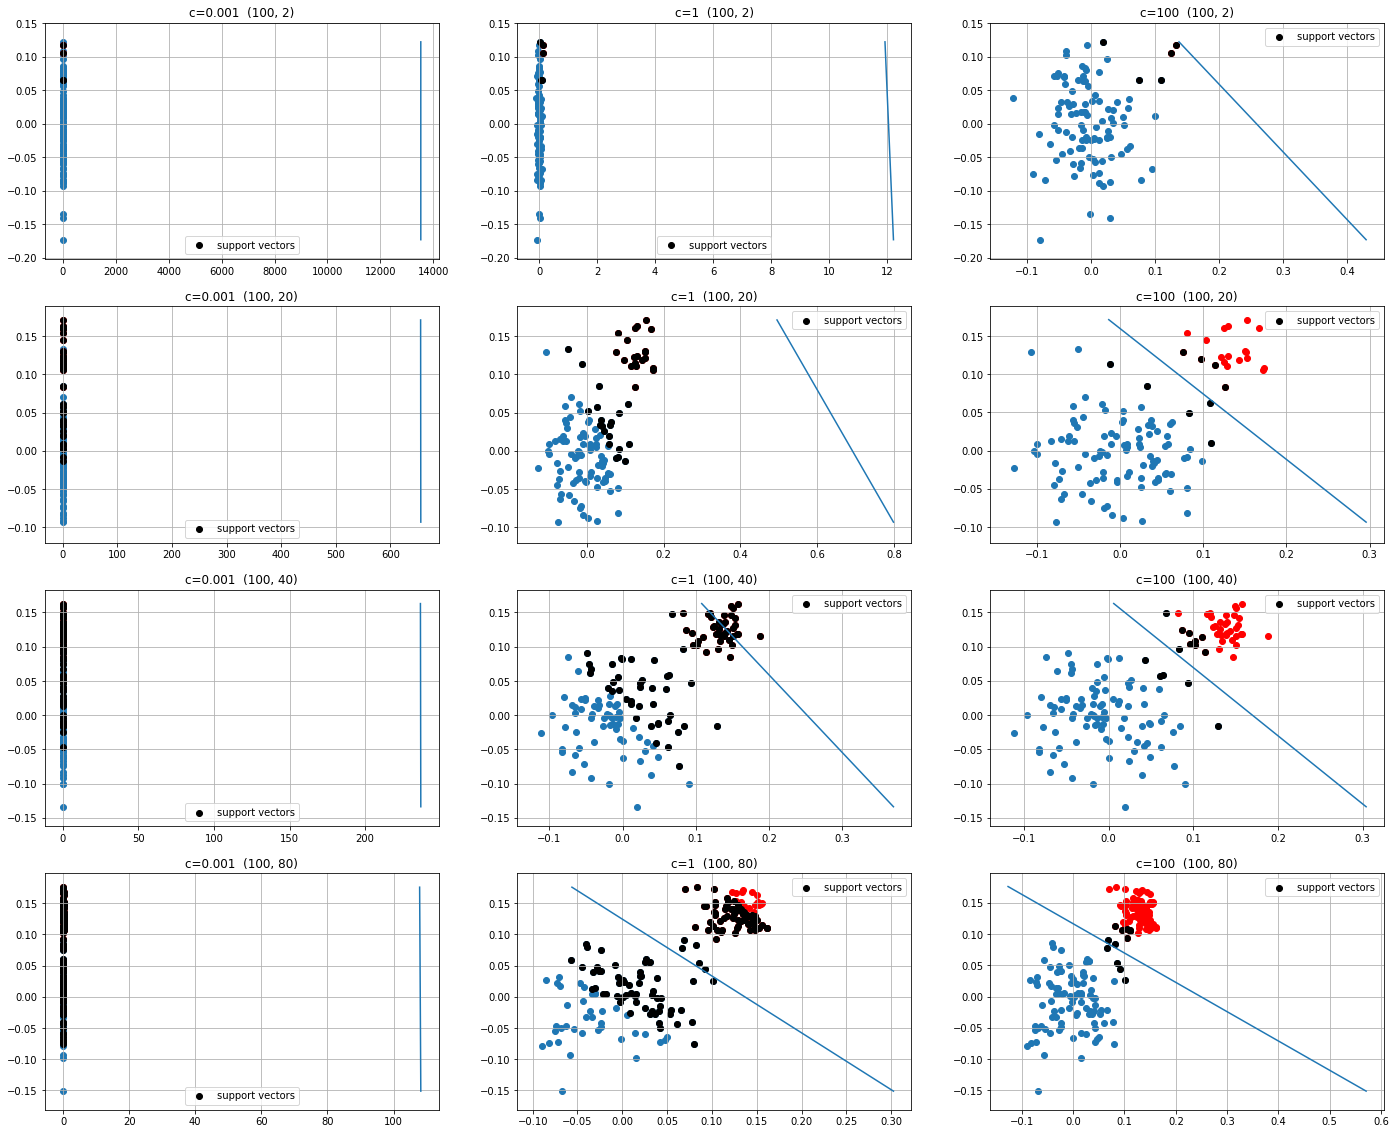

In [4]:
np.random.seed(15)
s=0
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
rate= [0.001, 1, 100]
plt.figure(figsize=(24,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3):
        s=s+1
        plt.subplot(4,3,s)
        plt.title("c="+str(rate[k])+"  "+str(i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf=SVC(kernel="linear",C=rate[k],random_state=15)
        clf.fit(X,y)  # GETTING THE INTERCEPT AND WEIGHT COEFFICIENT
        weight=clf.coef_
        intercept=clf.intercept_
        sv=clf.support_vectors_
        
        plt.scatter(sv[:,0],sv[:,1],color="black",label='support vectors')
        plt.legend()
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)

### Task 2: Applying LR

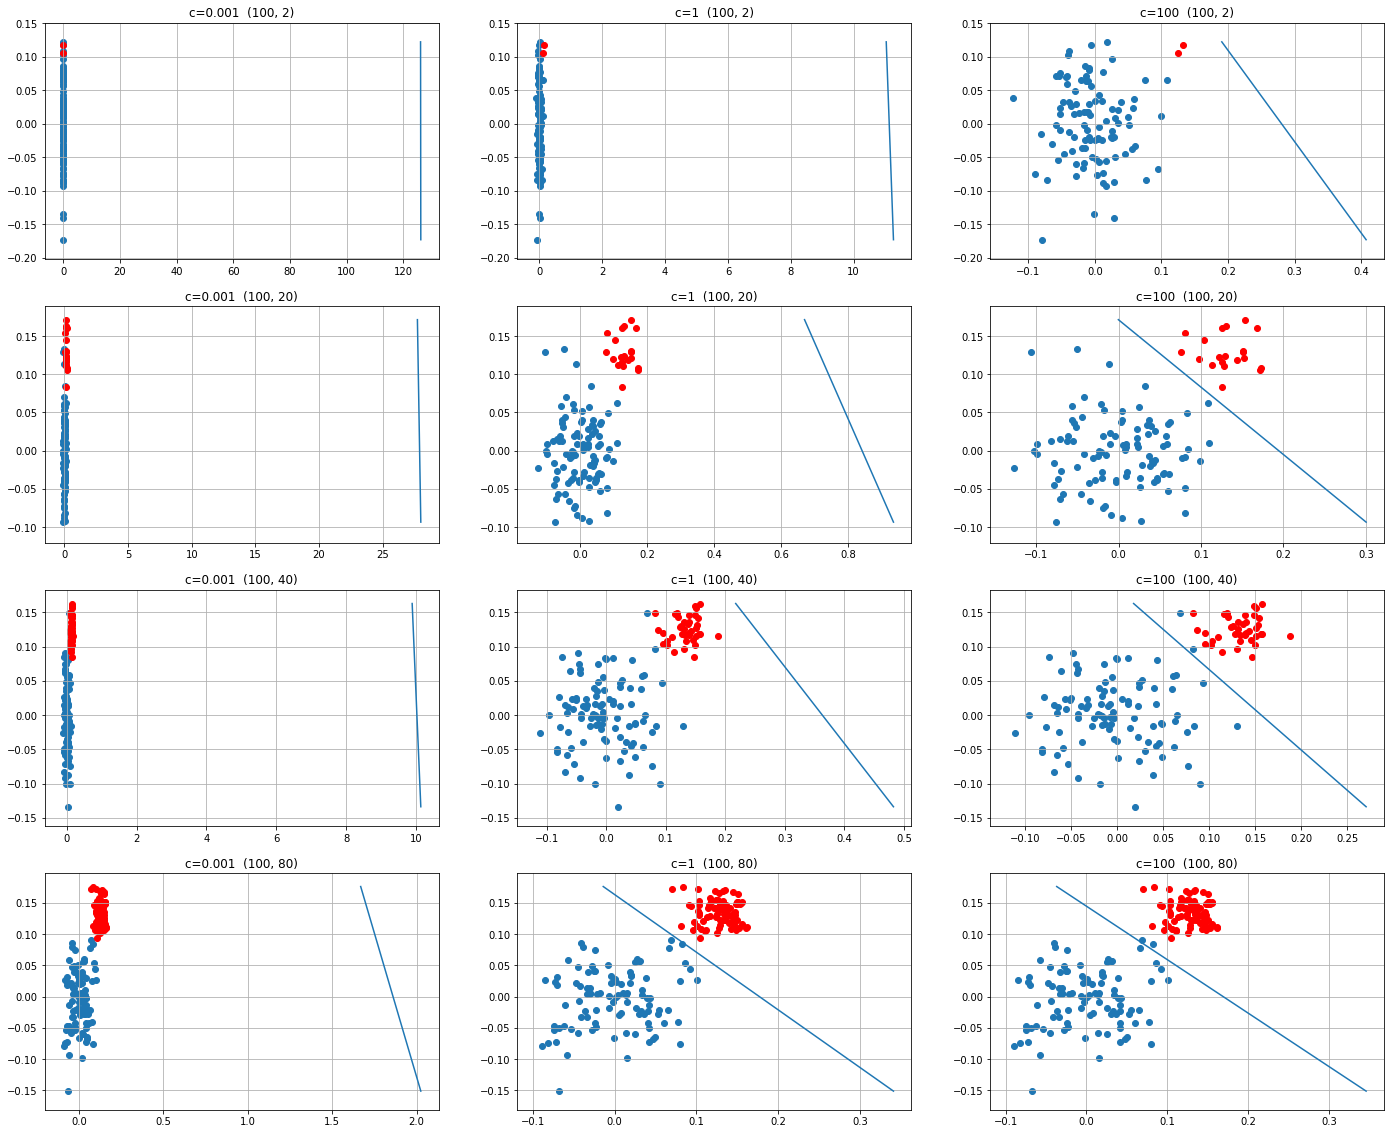

In [17]:
np.random.seed(15)
s=0
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
rate= [0.001, 1, 100]
plt.figure(figsize=(24,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3):
        s=s+1
        plt.subplot(4,3,s)
        plt.title("c="+str(rate[k])+"  "+str(i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = LogisticRegression(C=rate[k],random_state=15)
        clf.fit(X,y)
        weight=clf.coef_
        intercept=clf.intercept_
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)
        

#### Observations

* Both svm and lr  c is a hyper parameter which is inverse of regularization strength.
* so the regularization discourages learning complex functions ,to avoid the risk of overfitting
* as c decreases regularization strength increases and it moves to underfit ,it will consider all points as single class
* as c increases regularization strength decreases it tries to reduce underfitr and  it tries to recognize dataset has 2 classes
* at larger c(c=100) regularization has only small effect,it will do correct fitting and leads to overfitting

<img src="https://imgur.com/8RWWHvW.jpg">

<img src="https://imgur.com/XKL9tin.jpg">